In [287]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

In [144]:
nyc_data = pd.read_csv("/data/bikeshare/data/unified/nyc.csv")
boston_data = pd.read_csv("/data/bikeshare/data/unified/boston.csv")
main_data = pd.read_csv("/data/bikeshare/data/unified/merged.csv")

In [145]:
nyc = {'name':'New York City, NY', 'data':nyc_data}
boston = {'name':'Boston, MA', 'data':boston_data}
main = {'name':'All Data', 'data':main_data}

## Users by Age
How does bikeshare service usage differ by age?

In [146]:
def users_by_age(data):
    age_counts = (2018 - data['data'].birth_year).value_counts()
    axes = plt.gca()
    axes.set_xlim([18,80])
    plt.bar(age_counts.index, age_counts)
    plt.xlabel("Age")
    plt.ylabel("Count")
    plt.title("Age of Bikeshare Riders in {}".format(data['name']))
    plt.show()

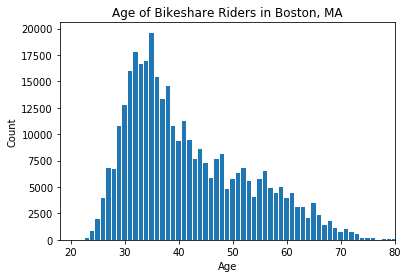

In [147]:
users_by_age(boston)

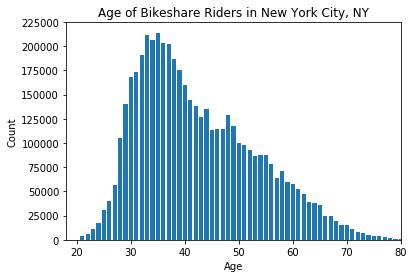

In [148]:
users_by_age(nyc)

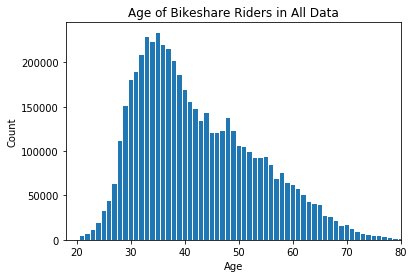

In [149]:
users_by_age(main)

In [192]:
# Distribution of age
(2018 - main_data.birth_year).describe()

count    5.232128e+06
mean     4.240304e+01
std      1.105295e+01
min      2.100000e+01
25%      3.400000e+01
50%      4.000000e+01
75%      5.000000e+01
max      1.190000e+02
Name: birth_year, dtype: float64

__Analysis__ <br>
Taking a closer look at the main data. We can see that the distribution of age is skewed to the right. The majority of the users are between their 30s-50s. A reason for the use of bicycles for the current demographic could be 2 reasons in my opinion:
1. As people earn more, they stray away from bicycles. Hence people with higher median earnings (who generally tend to be older, could use other means of transportation)
2. While the bicycles are cheaper than taxis and ride hailing apps, they are more expensive than the metro in NYC or Boston. Demographics with a lower income, generally <20 year olds could use the metro otherwise.



## Riders by Hour of Day

In [283]:
def riders_by_hour(data):
    n = 10000
    sample = data['data'].sample(n)
    times = pd.DatetimeIndex(pd.to_datetime(sample.start_time))
    age = (2018 - sample.birth_year)
    d = sample.groupby([times.hour]).duration.count()
    plt.bar(d.index, d/n)
    axes = plt.gca()
    plt.xlabel("Hour of Day")
    plt.ylabel("Percentage")
    axes.set_xlim([0,23])
    plt.title("Age of Bikeshare Riders in {}".format(data['name']))
    plt.show()

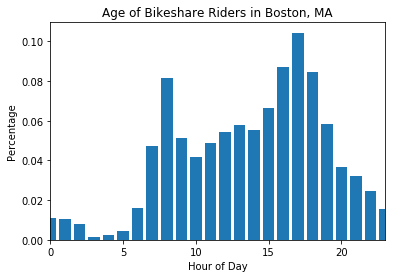

In [284]:
riders_by_hour(boston)

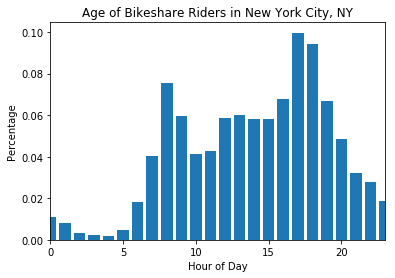

In [285]:
riders_by_hour(nyc)

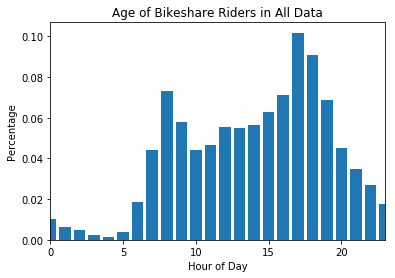

In [286]:
riders_by_hour(main)

## Gender of Users
How does bikeshare service usage differ by gender?

In [183]:
def users_by_gender(data):
    x = data['data'].gender.value_counts().index
    y = data['data'].gender.value_counts()
    count = data['data'].gender.count()
    plt.bar(x, y/count)
    axes = plt.gca()
    axes.set_ylim([0,1])
    plt.ylabel("Ratio out of {} riders".format(count))
    plt.title("Age of Bikeshare Riders in {}".format(data['name']))
    plt.show()

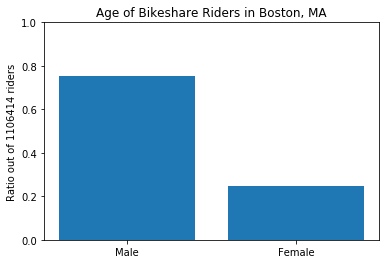

In [185]:
users_by_gender(boston)

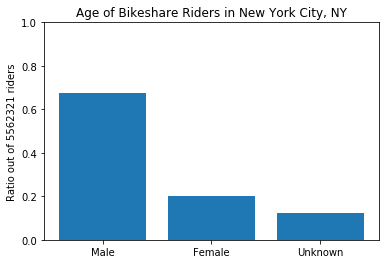

In [186]:
users_by_gender(nyc)

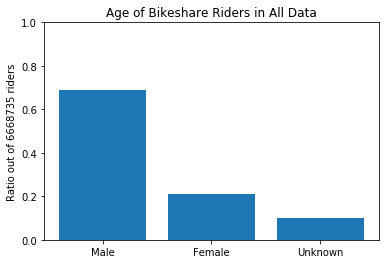

In [181]:
users_by_gender(main)

Male ridership seems to be higher in Boston compared to NYC where male ridership is 80% with females being under 20%. In NYC, male ridership is a little above 60% and female ridership is also higher above 20%.